# TODO
* Group values
* Sort rivers by distance
* Find attached rivers by distance

In [59]:
import requests
import pandas as pd
import folium
import sqlite3
import io
import matplotlib.pyplot as plt  #for data visualization operations
import seaborn as sns

# to show all rows and columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [60]:
def dict_factory(cursor, row):
    fields = [column[0] for column in cursor.description]
    return {key: value for key, value in zip(fields, row)}

# DB Connect

In [61]:
con = sqlite3.connect("pegelstaende.db")
con.row_factory = dict_factory
cur = con.cursor()
con.execute('PRAGMA foreign_keys = ON;')

In [62]:
# # Execute the DELETE statement
# cur.execute("PRAGMA foreign_keys = OFF")
# cur.execute("DELETE FROM timeseries WHERE value = 'XXX,XXX'")
# cur.execute("PRAGMA foreign_keys = ON")
# # Commit the changes
# con.commit()

In [63]:
def run(sql):
    r = cur.execute(sql)
    return(r.fetchall())

In [83]:
stations = (pd.DataFrame(run("""SELECT 
        r.name As fluss,
        s.name AS station,
        max(ts.date) as last_date

    FROM rivers r
    LEFT JOIN stations s ON r.id = s.river_id
    LEFT JOIN timeseries ts ON s.uuid = ts.uuid
    GROUP BY s.uuid
    ORDER BY last_date DESC
    limit 10
    """)))
display(stations)

In [82]:
rivers = (pd.DataFrame(run("""SELECT 
        r.name,
        count(s.uuid) as count

    FROM rivers r
    LEFT JOIN stations s ON r.id = s.river_id
    GROUP BY r.id
    HAVING count > 9 or r.name = "Neckar"
    ORDER BY count DESC
    """)))
display(rivers)

,name,count
0,Elbe,70
1,Rhein,32
2,Weser,32
3,Ostsee,30
4,Untere Havel-Wasserstrasse,26
5,Müritz-Elde-Wasserstrasse,22
6,Nordsee,20
7,Saale,18
8,Donau,16
9,Ems,16


In [65]:
data = (pd.DataFrame(run("""SELECT 
        *
    FROM rivers r
    LEFT JOIN stations s ON r.id = s.river_id
    LEFT JOIN timeseries ts ON s.uuid = ts.uuid
    WHERE r.name = "Donau"
    """)))

data["km"] = data["km"].astype(float)
display(data.head())
display(data.tail())


,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
0,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,0.00,W,00:01,302.00
1,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,1.00,W,00:02,302.00
2,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,2.00,W,00:03,302.00
3,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,3.00,W,00:04,302.00
4,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,4.00,W,00:05,302.00


,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
116417,8,Pfatter,f768173a-7a22-40f7-90a3-4676da7e5010,8,10068006,2350.69,Standort Regensburg,48.98,12.38,2023-06-13 09:40:29,2023-06-13,25.00,W,06:30,316.00
116418,8,Pfatter,f768173a-7a22-40f7-90a3-4676da7e5010,8,10068006,2350.69,Standort Regensburg,48.98,12.38,2023-06-13 09:40:29,2023-06-13,26.00,W,06:45,316.00
116419,8,Pfatter,f768173a-7a22-40f7-90a3-4676da7e5010,8,10068006,2350.69,Standort Regensburg,48.98,12.38,2023-06-13 09:40:29,2023-06-13,27.00,W,07:00,317.00
116420,8,Pfatter,f768173a-7a22-40f7-90a3-4676da7e5010,8,10068006,2350.69,Standort Regensburg,48.98,12.38,2023-06-13 09:40:29,2023-06-13,28.00,W,07:15,317.00
116421,8,Pfatter,f768173a-7a22-40f7-90a3-4676da7e5010,8,10068006,2350.69,Standort Regensburg,48.98,12.38,2023-06-13 09:40:29,2023-06-13,29.00,W,07:30,320.00


In [66]:


# num_colors = data["km"].drop_duplicates().shape[0]

# # Generate a list of distinct colors using a seaborn palette
# color_palette = sns.color_palette("hls", num_colors)


# fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
# i = 0
# for station, d1 in data.groupby("km"):
#     g = d1.groupby(["date"])["value"].mean().plot.line(color=color_palette[i], label=d1.name.values[0] + "(" + str(station) + ")")
#     i += 1
   
# axes.legend(loc="lower right")

## Check the order of the stations

In [67]:
# map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)
# river = data.name.values[0]
# group = folium.FeatureGroup(name=river)
# locations = []
# for km, station in sorted(data.groupby("km")):
#     lat = station['latitude'].values[0]
#     lng = station['longitude'].values[0]
#     print(km, lat, lng)
#     locations.append((lat, lng))
#     folium.Marker(station[["latitude", "longitude"]].drop_duplicates(), 
#                     popup=river + " (" + str(km) + ")", #.title() + "  (" + row['longname'].title() + ") [" + row['agency'] + "]" + str(row['number']) + " / " + str(row['km']),
#                     icon=folium.Icon(color='blue', icon='info-sign')).add_to(group)
# # Add the group to the map
# group.add_to(map)
# folium.PolyLine(locations, color='blue', weight=2.5).add_to(group)
# # Add layer control to the map
# folium.LayerControl().add_toa(map)

# # Display the map
# map


## Check if we can see a wave when looking at the minutes?

In [68]:
data.head(2)

,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
0,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,0.00,W,00:01,302.00
1,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,1.00,W,00:02,302.00


In [69]:
import numpy as np
from datetime import datetime, timedelta

# Increment the 'date' column by one day for rows where 'key' was "24:00"
mask = data['key'] == "24:00"  # Create a mask for rows where 'key' is "00:00"

# Create a new column 'timestamp' by combining 'date' and 'key' fields
data.loc[mask, 'key'] = data.loc[mask, 'key'].replace("24:00", "00:00")
data.loc[mask, 'date'] = str(pd.to_datetime(pd.to_datetime(data.loc[mask, 'date']) + timedelta(days=1)).dt.date)
# data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['key'])

# # Set 'timestamp' column as the DataFrame index
# data = data.set_index('timestamp')

# # Group the data by 'station' column
# grouped_data = data.groupby('uuid')

# # Create an empty DataFrame to store the processed data
# processed_data = pd.DataFrame()

# # Iterate over each group (station)
# for uuid, group in grouped_data:
#     # Sort the group by timestamp
#     group = group.sort_index()
    
#     # Calculate the rolling average within a window of +/- 5 minutes
#     rolling_avg = group['value'].rolling('30T', min_periods=1, center=True).mean()
    
#     # Replace outlier values by the rolling average
#     outliers = np.abs(group['value'] - rolling_avg) > (rolling_avg * 0.8)
#     #print(group[outliers])
#     group.loc[outliers, 'value'] = rolling_avg[outliers]
    
#     # Add the processed group to the processed data
#     #processed_data = processed_data.append(group)
#     processed_data = pd.concat([processed_data, group])

# # Reset the index of the processed data
# processed_data = processed_data.reset_index()

# Print the processed data
#print(processed_data)

In [56]:
data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['key'])

# Set 'timestamp' column as the DataFrame index
data = data.set_index('timestamp')

# Group the data by 'station' column
grouped_data = data.groupby('uuid')

# Create an empty DataFrame to store the aggregated results
aggregated_data = pd.DataFrame()

# Iterate over each group (station)
for uuid, group in grouped_data:
    compress = False
    for day, daydata in group.groupby("date"):
        if daydata.shape[0] > 96:
            print(f"Compress timeseries for the type {daydata.type.values[0]} for {uuid}")
            compress = True
            break

    if compress == False:
        aggregated_data = pd.concat([aggregated_data, group])
    else:
        # Resample the group to 15-minute intervals and calculate the mean value
        #resampled_group = group.resample('15T').mean()
        group['value'] = group['value'].resample('15T').mean()
        group = group.dropna(subset=['value'])
        aggregated_data = pd.concat([aggregated_data, group])
        display(group.head(5))

# Reset the index of the aggregated data
data2 = aggregated_data.reset_index()

Compress timeseries for the type W for 0fd56e0a-e32e-4b56-9cda-e0ce93d715c4


,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
timestamp,,,,,,,,,,,,,,,
2023-05-01 00:15:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,14.00,W,00:15,300.47
2023-05-01 00:30:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,29.00,W,00:30,299.20
2023-05-01 00:45:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,44.00,W,00:45,299.00
2023-05-01 01:00:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,59.00,W,01:00,298.53
2023-05-01 01:15:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,74.00,W,01:15,297.87


In [57]:
data2[data2.uuid == "0fd56e0a-e32e-4b56-9cda-e0ce93d715c4"].head(16)

,timestamp,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
0,2023-05-01 00:15:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,14.00,W,00:15,300.47
1,2023-05-01 00:30:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,29.00,W,00:30,299.20
2,2023-05-01 00:45:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,44.00,W,00:45,299.00
3,2023-05-01 01:00:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,59.00,W,01:00,298.53
4,2023-05-01 01:15:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,74.00,W,01:15,297.87
5,2023-05-01 01:30:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,89.00,W,01:30,297.47
6,2023-05-01 01:45:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,104.00,W,01:45,296.93
7,2023-05-01 02:00:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,119.00,W,02:00,297.13
8,2023-05-01 02:15:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,134.00,W,02:15,296.93
9,2023-05-01 02:30:00,8,Kachlet Up,0fd56e0a-e32e-4b56-9cda-e0ce93d715c4,8,10090708,2230.32,Standort Regensburg,48.58,13.41,2023-06-13 09:40:29,2023-05-01,149.00,W,02:30,296.87


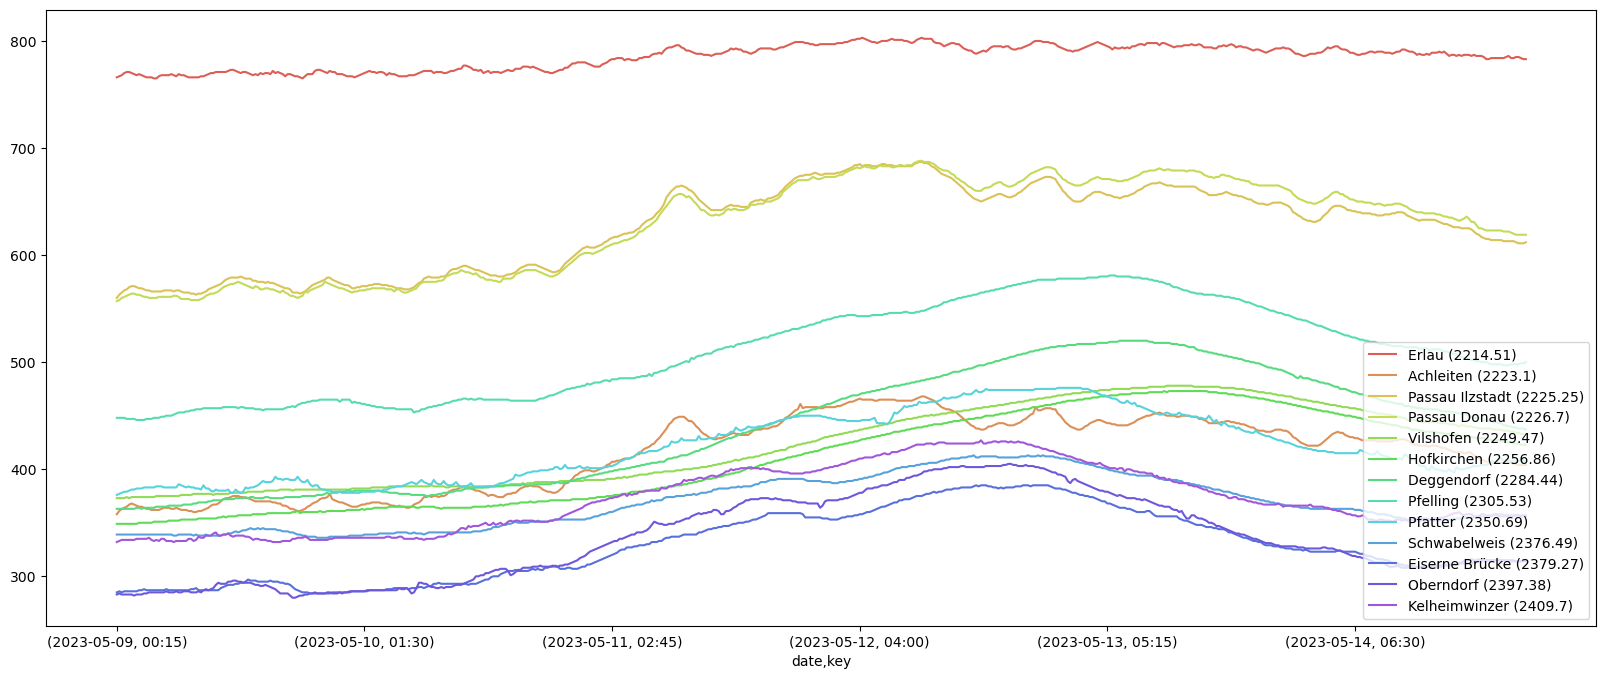

In [74]:

num_colors = data["km"].drop_duplicates().shape[0]

# Generate a list of distinct colors using a seaborn palette
color_palette = sns.color_palette("hls", num_colors)

fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
i = 0
for station, d1 in data[(data.uuid != "0fd56e0a-e32e-4b56-9cda-e0ce93d715c4" ) & (data.date > "2023-05-08") & (data.date < "2023-05-15")].groupby("km"):
    # display(d1.tail(2))
    # if i > 5:
    #     continue

    d1['value_diff'] = d1['value'].diff()

    # # Plot the changes in water level
    # plt.plot(data['date'], data['waterlevel_change'])
    # plt.xlabel('Date')
    # plt.ylabel('Water Level Change')
    # plt.title('Changes in Water Level')
    # plt.show()

    g = d1.groupby(["date", "key"])["value"].mean().plot.line(color=color_palette[i], label=d1.name.values[0] + " (" + str(station) + ")")
    i += 1

axes.legend(loc="lower right")



In [ ]:
data.dtypes

In [ ]:
data['value'] = data['value'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# non_decimal_values = data[data['value'].notna() & data['value'].astype(str).str.contains('[^0-9.]')]
# print(non_decimal_values['value'].head())

In [ ]:
data = data.astype({
    'date': 'datetime64[D]'})

In [ ]:
display(data.head())
print(data.shape)
display(data.describe())
print(data.dtypes)

In [ ]:
max_std = 0
max_uuid = ""
for uuid, d in data.groupby("uuid"):

    if uuid in [ "8727ebfd-e2e1-43da-ab3d-fee48cff9acc", "438b565e-f293-43c8-8771-377e555ed5ec", "f4f9f7fb-eeff-46dc-9727-04d8aa56240a", "edfdf747-be92-462f-87ed-53d228a33172" ]:
        continue
    elif d["value"].min() <= 0:
        print(uuid, "negative min value", d["value"].min())
        continue

    if ( d["value"].max() - d["value"].min() ) > max_std:
        max_uuid = uuid
        max_std = d["value"].max() - d["value"].min()

print(max_uuid, " (", max_std, ")")

data[data.uuid == max_uuid].describe()

# Twice the amount for a entry
8798527	f4f9f7fb-eeff-46dc-9727-04d8aa56240a	2023-05-22	299	W	05:00	511.00
8798528	f4f9f7fb-eeff-46dc-9727-04d8aa56240a	2023-05-22	300	W	05:01	1023.00
8798529	f4f9f7fb-eeff-46dc-9727-04d8aa56240a	2023-05-22	301	W	05:02	512.00

# Outliers
3539775	edfdf747-be92-462f-87ed-53d228a33172	2023-05-31	650	W	10:51	570.00
3539776	edfdf747-be92-462f-87ed-53d228a33172	2023-05-31	651	W	10:52	6.00
3539777	edfdf747-be92-462f-87ed-53d228a33172	2023-05-31	652	W	10:53	566.00

In [ ]:
data[data.uuid == max_uuid].sort_values("value", ascending=True).head()

In [ ]:
data[(data.uuid == "5d0f9471-f1cb-4b53-9996-067d68d2ce2a")].tail(100)

In [ ]:
import matplotlib.pyplot as plt  #for data visualization operations

fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data[data.uuid == "c8b9a2b6-b783-417f-8479-3a0d732fb901"].groupby(["date"])["value"].mean().plot.line(color="red")


In [ ]:
data[(data.uuid == "c8b9a2b6-b783-417f-8479-3a0d732fb901") & (data.date == "2023-06-01")].head()

In [ ]:
data[(data.uuid == "c8b9a2b6-b783-417f-8479-3a0d732fb901") & (data.value < 0)]

In [76]:
data = (pd.DataFrame(run("""SELECT 
        *
    FROM rivers r
    LEFT JOIN stations s ON r.id = s.river_id
    LEFT JOIN timeseries ts ON s.uuid = ts.uuid
    WHERE s.uuid = "c0ec139b-13b4-4f86-bee3-06665ad81a40"
    """)))

data["km"] = data["km"].astype(float)
display(data.head())
display(data.tail())


,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
0,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-05-02,0,W,00:01,552
1,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-05-02,1,W,00:02,550
2,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-05-02,2,W,00:03,549
3,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-05-02,3,W,00:04,547
4,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-05-02,4,W,00:05,546


,id,name,uuid,river_id,number,km,agency,latitude,longitude,last_update,date,idx,type,key,value
62403,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-06-13,496,W,08:17,572
62404,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-06-13,497,W,08:18,571
62405,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-06-13,498,W,08:19,571
62406,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-06-13,499,W,08:20,571
62407,54,Helgoland Binnenhafen,c0ec139b-13b4-4f86-bee3-06665ad81a40,54,9510070,0.00,Standort Tönning,54.18,7.89,2023-06-13 09:40:29,2023-06-13,500,W,08:21,570


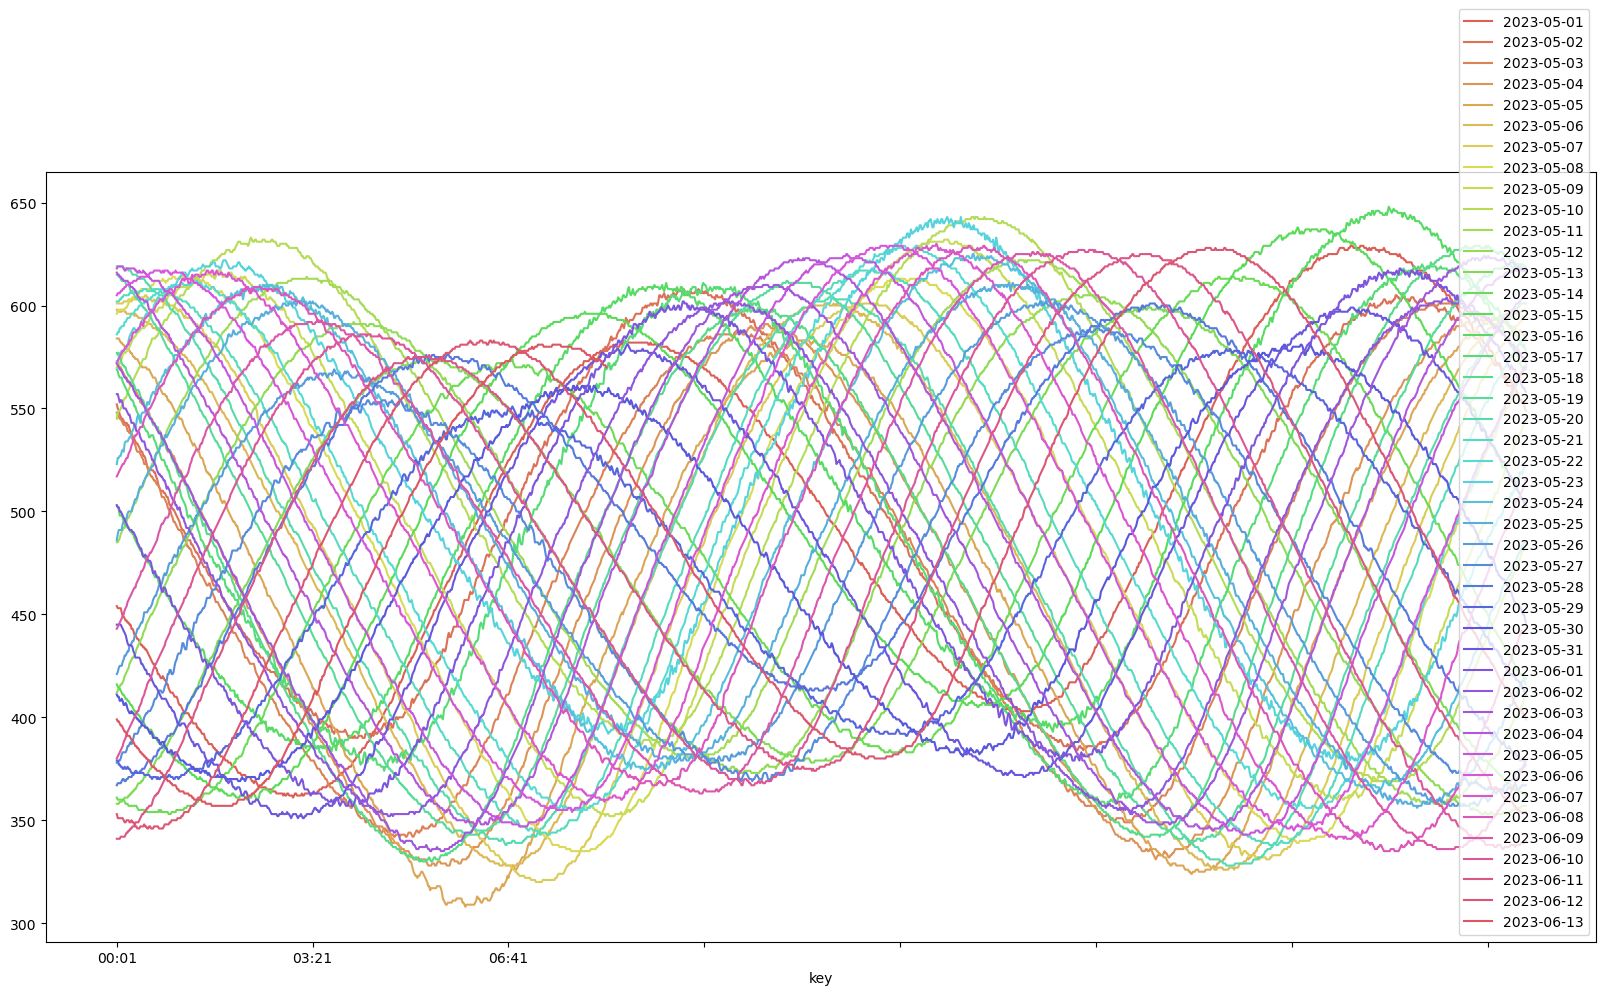

In [79]:
num_colors = len(data.groupby("date"))

# Generate a list of distinct colors using a seaborn palette
color_palette = sns.color_palette("hls", num_colors)


fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 10))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
i = 0
# 3954300d-f112-4fe6-8d0a-b06496372e36
# 8c8afb56-88ea-483a-a7d4-033c22f53497
# 6dc44585-5b88-45d7-9c64-7c845408b698
# ca3f535b-4a32-4dd7-a56b-2ac20dea4472
# c0ec139b-13b4-4f86-bee3-06665ad81a40
# ca0e4a68-bd50-494c-bd45-abb33c5e1b0a
for date, d in data[data.uuid == "c0ec139b-13b4-4f86-bee3-06665ad81a40"].groupby("date"):
    g = d.groupby(["key"])["value"].mean().plot.line(color=color_palette[i],label=date)
    i += 1
   
axes.legend(loc="lower right")


In [ ]:

# 2203fce7-9d1e-4586-84ab-0797468863a1
# ca0e4a68-bd50-494c-bd45-abb33c5e1b0a
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data[data.uuid == "ca0e4a68-bd50-494c-bd45-abb33c5e1b0a"].groupby(["date", "key"])["value"].mean().plot.line(color="red")


# Sort order for rivers

In [ ]:
# df = (pd.DataFrame(run("""SELECT 
#         *
#     FROM timeseries ts
    
#     """)))
# display(df.head())

# Plot Folium Map

In [ ]:
# map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# for group_name, group_data in df.groupby([df['water'].apply(lambda x: x['longname'])]):
#     # Create a feature group for the group
#     group = folium.FeatureGroup(name=group_name)
#     if group_name != "XEMS":
#         #display(group_data.sort_values("km"))#[["agency", "km", "longname"]])
#         #break
#         locations = []
#         # Add markers for each point in the group

#         # Print the sorted locations
#         for index, row in group_data.sort_values("km").iterrows():
#             #print(loc["agency"], loc["km"], loc["longname"])
#             locations.append((row['latitude'], row['longitude']))
#             folium.Marker(row[['latitude', 'longitude']], popup=group_name + " / " + row['longname'].lower() + " / " + row['agency'].lower() + " / " + str(row['km'])).add_to(group)
        
#         #print(locations)
#         # Create lines between points in the group
#         #locations = group_data[['latitude', 'longitude', group_name[0]]].values.tolist()
#         folium.PolyLine(locations, color='blue', weight=2.5).add_to(group)

#         # Add the group to the map
#         group.add_to(map)

# # Add layer control to the map
# folium.LayerControl().add_to(map)

# # Display the map
# map


# DB

# DB Disconnect

In [ ]:
cur.close()
con.close()